In [1]:
import folium
import pandas as pd
from scipy.spatial.distance import cdist
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Para ignorar todos os warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()


In [2]:
# Define the relative path to the CSV file from the location of your notebook
file_path = "datas/escolas122019.csv"

# Read the CSV file
escolas = pd.read_csv(file_path,sep=';')

# Display the escolas
escolas

,dre,codesc,tipoesc,nomesc,ceu,diretoria,subpref,endereco,numero,bairro,...,dom_criacao,dt_ini_conv,dt_ini_func,dt_autoriza,dt_extintao,nome_ant,rede,latitude,longitude,database
0,BT,191,EMEF,"ALIPIO CORREA NETO, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Avenida JOAO CAIAFFA,140,JARDIM TABOAO,...,27/05/1988,NaN,02/10/1988,16/03/1991,NaN,"ALIPIO CORREA NETO, PROF.",DIR,-23.612.237,-46.749.888,01/12/2019
1,BT,213,EMEI,"ANTONIO CARLOS PACHECO E SILVA, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Avenida JOÃO CAIAFFA,90,JARDIM TABOÃO,...,07/06/1988,NaN,26/09/1988,13/03/2001,NaN,"ANTONIO CARLOS PACHECO E SILVA, PROF.",DIR,-23.611.929,-46.750.176,01/12/2019
2,BT,477,EMEF,PROFA. EDA TEREZINHA CHICA MEDEIROS,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua ENGENHEIRO HUGO TAKAHASHI,333,RAPOSO TAVARES,...,26/10/1988,NaN,20/02/1989,16/03/1991,NaN,"EDA TEREZINHA CHICA MEDEIROS, PROFA.",DIR,-23.602.076,-46.783.825,01/12/2019
3,BT,11924,EMEF,PROFA. MARIA ALICE BORGES GHION,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua CACHOEIRA PORAQUÊ,575,CONJUNTO PROMORAR RAPOSO TAVARES,...,17/02/1992,NaN,20/02/1992,13/03/2001,NaN,COHAB RAPOSO TAVARES,DIR,-23.586.959,-46.801.039,01/12/2019
4,BT,14591,EMEI,PROF. BENEDICTO CASTRUCCI,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua CACHOEIRA PORAQUE,S/N,CONJUNTO PROMORAR RAPOSO TAVARES,...,02/03/1994,NaN,13/04/1994,13/03/2001,NaN,CONJ. HABITACIONAL RAPOSO TAVARES,DIR,-23.586.339,-46.800.967,01/12/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,SM,501468,MOVA,ASS MORADORES NA LUTA MORADIA DO CONJ TEOTONIO...,NaN,DIRETORIA REGIONAL DE EDUCACAO SAO MATEUS,SAPOPEMBA,Travessa CECÍLIO BAEZ,16,FAZENDA DA JUTA,...,18/10/2013,18/10/2013,NaN,NaN,NaN,ASS MORADORES NA LUTA MORADIA DO CONJ TEOTONIO...,CON,-23.623.674,-46.489.887,01/12/2019
4906,SM,501507,MOVA,ASS MORAODRES NA LUTA PELA MORADIA,NaN,DIRETORIA REGIONAL DE EDUCACAO SAO MATEUS,SAPOPEMBA,Rua ESQUIVEL NAVARRO,677,CONJUNTO HABITACIONAL TEOTONIO VILELA,...,11/03/2015,NaN,NaN,NaN,NaN,ASS MORADORES NA LUTA PELA MORADIA,CON,-23.607.238,-4.650.539,01/12/2019
4907,SM,501513,MOVA,ASS MORADORES NA LUTA P MORADIA DO CONJ TEOTON...,NaN,DIRETORIA REGIONAL DE EDUCACAO SAO MATEUS,SAO MATEUS,Rua JOAQUIM GOUVEIA FRANCO,928,CIDADE SÃO MATEUS,...,11/06/2015,NaN,NaN,NaN,NaN,ASS MORADORES NA LUTA P MORADIA DO CONJ TEOTON...,CON,-23.596.456,-46.490.716,01/12/2019
4908,SM,501576,MOVA,AEC PADRE LUIZ SUTTER,NaN,DIRETORIA REGIONAL DE EDUCACAO SAO MATEUS,SAO MATEUS,Rua MARTINS LOPES LOBO,63,JARDIM SÃO FRANCISCO,...,20/07/2016,NaN,NaN,NaN,NaN,AEC PADRE LUIZ SUTTER,CON,-23.624.554,-46.448.039,01/12/2019


In [3]:
# Define the relative path to the CSV file from the location of your notebook
file_path = "datas/sao-paulo-properties-april-2019.csv"

# Read the CSV file
imoveis = pd.read_csv(file_path,sep=',')

# Display the data
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


### Limpeza das bases de dados

In [4]:
escolas.columns

Index(['dre', 'codesc', 'tipoesc', 'nomesc', 'ceu', 'diretoria', 'subpref',
       'endereco', 'numero', 'bairro', 'cep', 'tel1', 'tel2', 'fax',
       'situacao', 'coddist', 'distrito', 'setor', 'codinep', 'cd_cie', 'eh',
       'fx_etaria', 'dt_criacao', 'ato_criacao', 'dom_criacao', 'dt_ini_conv',
       'dt_ini_func', 'dt_autoriza', 'dt_extintao', 'nome_ant', 'rede',
       'latitude', 'longitude', 'database'],
      dtype='object')

In [5]:
#remover colunas que n precisam
escolas=escolas[['dre','nomesc','tipoesc','bairro','latitude','longitude']]
escolas

,dre,nomesc,tipoesc,bairro,latitude,longitude
0,BT,"ALIPIO CORREA NETO, PROF",EMEF,JARDIM TABOAO,-23.612.237,-46.749.888
1,BT,"ANTONIO CARLOS PACHECO E SILVA, PROF",EMEI,JARDIM TABOÃO,-23.611.929,-46.750.176
2,BT,PROFA. EDA TEREZINHA CHICA MEDEIROS,EMEF,RAPOSO TAVARES,-23.602.076,-46.783.825
3,BT,PROFA. MARIA ALICE BORGES GHION,EMEF,CONJUNTO PROMORAR RAPOSO TAVARES,-23.586.959,-46.801.039
4,BT,PROF. BENEDICTO CASTRUCCI,EMEI,CONJUNTO PROMORAR RAPOSO TAVARES,-23.586.339,-46.800.967
...,...,...,...,...,...,...
4905,SM,ASS MORADORES NA LUTA MORADIA DO CONJ TEOTONIO...,MOVA,FAZENDA DA JUTA,-23.623.674,-46.489.887
4906,SM,ASS MORAODRES NA LUTA PELA MORADIA,MOVA,CONJUNTO HABITACIONAL TEOTONIO VILELA,-23.607.238,-4.650.539
4907,SM,ASS MORADORES NA LUTA P MORADIA DO CONJ TEOTON...,MOVA,CIDADE SÃO MATEUS,-23.596.456,-46.490.716
4908,SM,AEC PADRE LUIZ SUTTER,MOVA,JARDIM SÃO FRANCISCO,-23.624.554,-46.448.039


In [6]:
imoveis.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [7]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [8]:
imoveis=imoveis.drop(columns=['Property Type','Condo'])
imoveis['District'] = imoveis['District'].str.replace('/São Paulo', '')
imoveis

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
0,930,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,-23.543138,-46.479486
1,1000,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,-23.550239,-46.480718
2,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,-23.542818,-46.485665
3,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,-23.547171,-46.483014
4,1300,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,Jabaquara,sale,-23.653004,-46.635463
13636,545000,74,3,2,1,2,0,0,1,0,Jabaquara,sale,-23.648930,-46.641982
13637,515000,114,3,3,1,1,0,0,1,0,Jabaquara,sale,-23.649693,-46.649783
13638,345000,39,1,2,1,1,0,1,1,0,Jabaquara,sale,-23.652060,-46.637046


## EDA Imoveis

### Analise geoespacial 

#### 50 imoveis mais baratos e mais caros

In [9]:
imoveis_vendidos=imoveis[imoveis['Negotiation Type']=='sale']
imoveis_vendidos['Price_per_sqm']=imoveis_vendidos['Price']/imoveis_vendidos['Size']
imoveis_sorted = imoveis_vendidos.sort_values(by='Price_per_sqm', ascending=False)
map = folium.Map(location=[-23.550520, -46.633308], zoom_start=12) 

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3537043442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_vendidos['Price_per_sqm']=imoveis_vendidos['Price']/imoveis_vendidos['Size']


In [10]:
import folium
from IPython.display import display


# Crie um mapa
map = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)  # Ajuste as coordenadas e o zoom conforme necessário

# Adicione marcadores para os 10 imóveis mais caros
for index, row in imoveis_sorted.head(50).iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    price = row['Price_per_sqm']
    size = row['Size']
    rooms = row['Rooms']
    negotiation_type = row['Negotiation Type']
    
    popup_text = f"Price_per_sqm: R${price}<br>Size: {size} sqm<br>Rooms: {rooms}<br>Negotiation Type: {negotiation_type}"
    folium.Marker(location=[latitude, longitude], popup=popup_text, icon=folium.Icon(color='red')).add_to(map)

# Adicione marcadores para os 10 imóveis mais baratos
for index, row in imoveis_sorted.tail(50).iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    price = row['Price_per_sqm']
    size = row['Size']
    rooms = row['Rooms']
    negotiation_type = row['Negotiation Type']
    
    popup_text = f"Price_per_sqm: R${price}<br>Size: {size} sqm<br>Rooms: {rooms}<br>Negotiation Type: {negotiation_type}"
    folium.Marker(location=[latitude, longitude], popup=popup_text, icon=folium.Icon(color='blue')).add_to(map)

# Adicione uma legenda
legend_html = """
     <div style="position: fixed; 
                 bottom: 250px; left: 250px; width: 130px; height: 130px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity:0.8">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Mais Caros &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Mais baratos &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
      </div>
     """
map.get_root().html.add_child(folium.Element(legend_html))

# Exiba o mapa no Jupyter Notebook
display(map)


### Estatisticas descritivas 

In [11]:
imoveis.describe()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


### Analise variavel target

In [12]:
# Por exemplo, se você quiser criar um gráfico de dispersão com o Plotly Express
import plotly.express as px

fig = px.scatter(imoveis, x='Size', y='Price', color='District',
                 title='Preço por Metro Quadrado em Diferentes Bairros',
                 labels={'Price_per_sqm': 'Preço por Metro Quadrado', 'District': 'Bairro'},
                 hover_data=['Price', 'Size', 'District'])

fig.show()


### Analise variaveis numericas

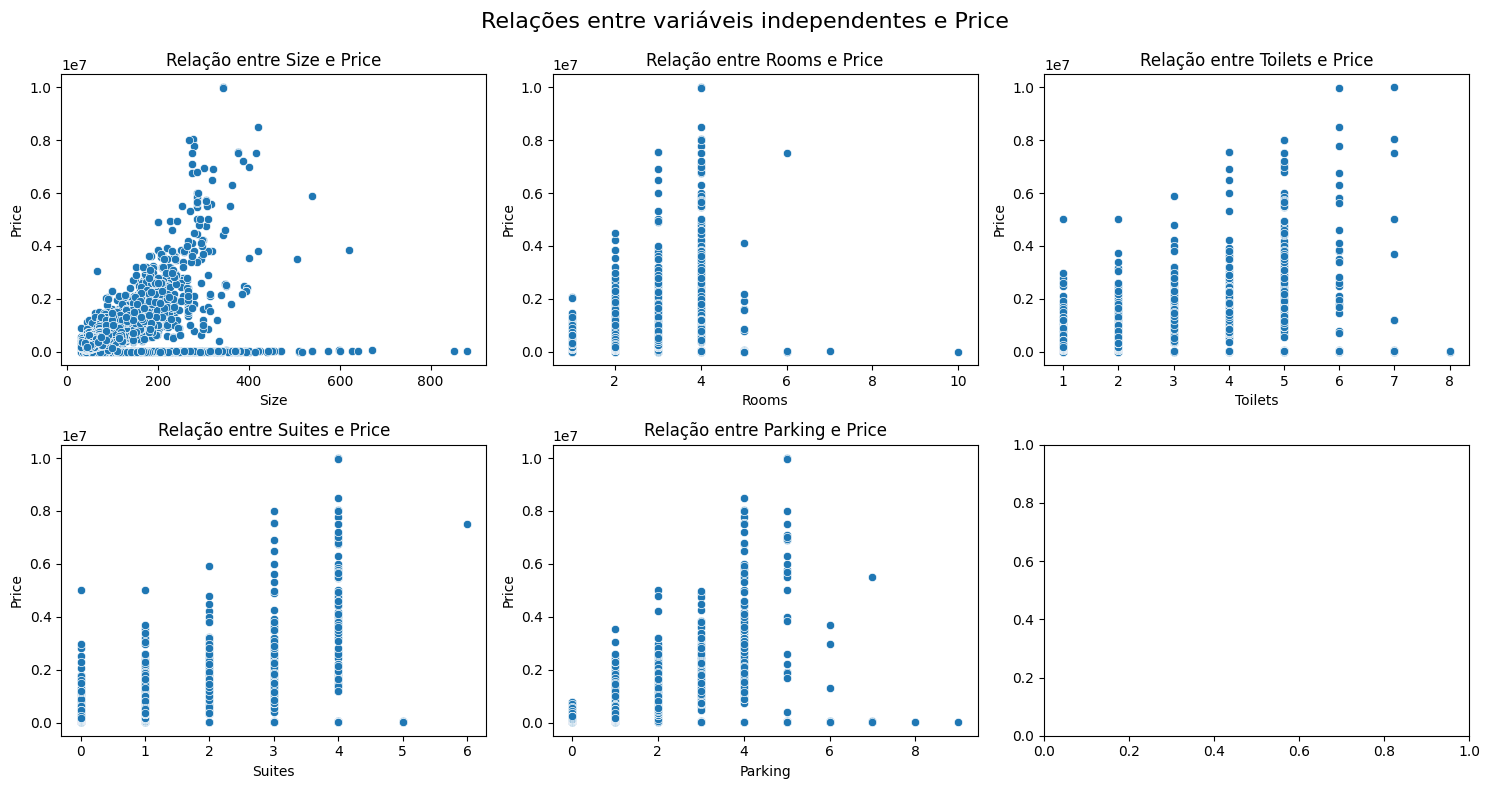

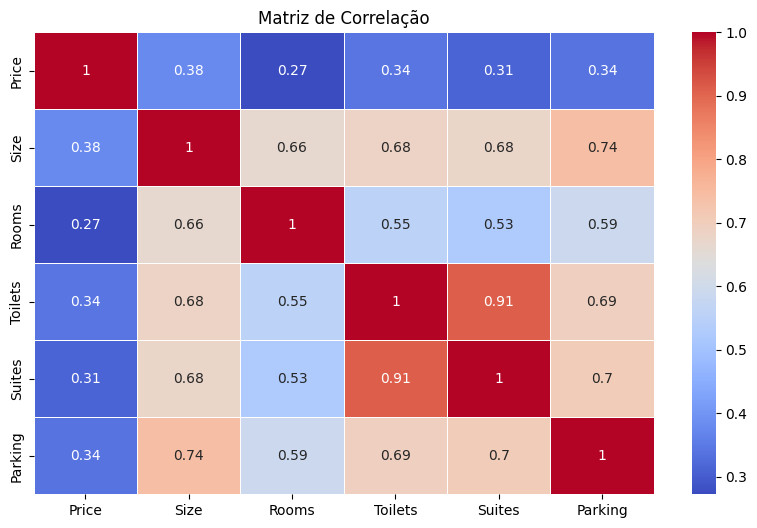

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando variáveis numéricas
numeric_vars = ['Price', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']

# Criando subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Relações entre variáveis independentes e Price", fontsize=16)

# Loop para criar gráficos de dispersão
for i, var in enumerate(numeric_vars[1:]):
    sns.scatterplot(data=imoveis, x=var, y='Price', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Relação entre {var} e Price')

# Ajustando layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Calculando coeficientes de correlação
correlation_matrix = imoveis[numeric_vars].corr()

# Criando um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


### Variaveis categoricas

In [14]:
import plotly.express as px
from plotly.subplots import make_subplots

# Adicionando uma nova coluna 'Price_per_sqm'
imoveis['Price_per_sqm'] = imoveis['Price'] / imoveis['Size']

# Criando subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=["Negotiation Type vs. Price",
                                                    "Top 10 Bairros Mais Baratos (Rent)",
                                                    "Top 10 Bairros Mais Caros (Rent)",
                                                    "Top 10 Bairros Mais Baratos (Sale)",
                                                    "Top 10 Bairros Mais Caros (Sale)"])

# Plotando gráficos de barras para 'Negotiation Type'
fig.add_trace(px.bar(imoveis, x='Negotiation Type', y='Price_per_sqm').data[0], row=1, col=1)

# Dividindo o gráfico 'District' em subgráficos (top 10 caros e top 10 baratos) para Rent e Sale
for i, negotiation_type in enumerate(['rent', 'sale']):
    top10_expensive_districts = imoveis[imoveis['Negotiation Type'] == negotiation_type].groupby('District')['Price_per_sqm'].mean().nlargest(10).index
    top10_cheap_districts = imoveis[imoveis['Negotiation Type'] == negotiation_type].groupby('District')['Price_per_sqm'].mean().nsmallest(10).index
    
    # Plotando gráfico de barras para 'District' (os 10 mais baratos) para Rent e Sale
    fig.add_trace(px.bar(imoveis[(imoveis['District'].isin(top10_cheap_districts)) & (imoveis['Negotiation Type'] == negotiation_type)],
                         x='District', y='Price_per_sqm').data[0], row=1+i, col=2)
    
    # Plotando gráfico de barras para 'District' (Top 10 caros) para Rent e Sale
    fig.add_trace(px.bar(imoveis[(imoveis['District'].isin(top10_expensive_districts)) & (imoveis['Negotiation Type'] == negotiation_type)],
                         x='District', y='Price_per_sqm').data[0], row=1+i, col=3)

# Atualizando layout
fig.update_layout(title_text="Relação entre variáveis categóricas e Price por metro quadrado", showlegend=False)
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=2, col=2)
fig.update_xaxes(tickangle=45, row=2, col=3)

# Exibindo o gráfico
fig.show()

# Exibindo médias de Price por metro quadrado
print("Média de Price por tipo de negociação:")
print(imoveis.groupby('Negotiation Type')['Price_per_sqm'].mean())

print("\nMédia de Price por metro quadrado por distrito:")
print(imoveis.groupby('District')['Price_per_sqm'].mean())


Média de Price por tipo de negociação:
Negotiation Type
rent      33.659012
sale    6891.640879
Name: Price_per_sqm, dtype: float64

Média de Price por metro quadrado por distrito:
District
Alto de Pinheiros    5358.418031
Anhanguera           3158.867458
Aricanduva           3202.787280
Artur Alvim          2133.041406
Barra Funda          4900.277270
                        ...     
Vila Matilde         2378.290000
Vila Olimpia         6896.919976
Vila Prudente        2879.607642
Vila Sônia           1575.125134
Água Rasa            3933.332553
Name: Price_per_sqm, Length: 96, dtype: float64


### Distribuição Negociation type

In [15]:
import plotly.express as px

# Gráfico de pizza para a distribuição das negociações com Plotly
fig = px.pie(imoveis, names='Negotiation Type', title='Distribuição das Negociações',
             labels={'Negotiation Type': 'Tipo de Negociação'}, 
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Exibe o gráfico
fig.show()



### Info sobre escolas

In [16]:
escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dre        4910 non-null   object
 1   nomesc     4910 non-null   object
 2   tipoesc    4910 non-null   object
 3   bairro     4910 non-null   object
 4   latitude   4910 non-null   object
 5   longitude  4910 non-null   object
dtypes: object(6)
memory usage: 230.3+ KB


In [17]:
escolas

,dre,nomesc,tipoesc,bairro,latitude,longitude
0,BT,"ALIPIO CORREA NETO, PROF",EMEF,JARDIM TABOAO,-23.612.237,-46.749.888
1,BT,"ANTONIO CARLOS PACHECO E SILVA, PROF",EMEI,JARDIM TABOÃO,-23.611.929,-46.750.176
2,BT,PROFA. EDA TEREZINHA CHICA MEDEIROS,EMEF,RAPOSO TAVARES,-23.602.076,-46.783.825
3,BT,PROFA. MARIA ALICE BORGES GHION,EMEF,CONJUNTO PROMORAR RAPOSO TAVARES,-23.586.959,-46.801.039
4,BT,PROF. BENEDICTO CASTRUCCI,EMEI,CONJUNTO PROMORAR RAPOSO TAVARES,-23.586.339,-46.800.967
...,...,...,...,...,...,...
4905,SM,ASS MORADORES NA LUTA MORADIA DO CONJ TEOTONIO...,MOVA,FAZENDA DA JUTA,-23.623.674,-46.489.887
4906,SM,ASS MORAODRES NA LUTA PELA MORADIA,MOVA,CONJUNTO HABITACIONAL TEOTONIO VILELA,-23.607.238,-4.650.539
4907,SM,ASS MORADORES NA LUTA P MORADIA DO CONJ TEOTON...,MOVA,CIDADE SÃO MATEUS,-23.596.456,-46.490.716
4908,SM,AEC PADRE LUIZ SUTTER,MOVA,JARDIM SÃO FRANCISCO,-23.624.554,-46.448.039


### Convertendo dataset escolas

In [18]:
# Função para converter o formato de latitude e longitude para float
def custom_conversion(dms_str):
    try:
        dms_str = dms_str.replace('.', '').replace(',', '.')
        return float(dms_str)
    except ValueError:
        return None


# Aplicar a função de conversão às colunas de latitude e longitude
escolas['latitude'] = escolas['latitude'].apply(custom_conversion)
escolas['longitude'] = escolas['longitude'].apply(custom_conversion)

escolas['latitude'] = escolas['latitude'] / 1e6
escolas['longitude'] = escolas['longitude'] / 1e6



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3216957682.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3216957682.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3216957682.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [19]:
# Criando uma nova coluna 'Tipo' com base na coluna 'tipoesc'
def categorizar_tipo_escola(tipoesc):
    if 'ESC.PART.' in tipoesc or 'CR.P.CONV' in tipoesc:
        return 'Privada'
    else:
        return 'Pública'

# Utilizando .loc para evitar o SettingWithCopyWarning
escolas['Tipo'] = escolas['tipoesc'].apply(categorizar_tipo_escola)

# Verificando as primeiras linhas do DataFrame com a nova coluna 'Tipo'
escolas=escolas[['nomesc','Tipo','latitude','longitude','bairro']]

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\1116920737.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Criando uma nova coluna 'Coordenadas' contendo tuplas de latitude e longitude
escolas['Coordenadas'] = list(zip(escolas['latitude'], escolas['longitude']))


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3467559739.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
escolas=escolas[['nomesc','bairro','Tipo', 'Coordenadas']]
escolas

,nomesc,bairro,Tipo,Coordenadas
0,"ALIPIO CORREA NETO, PROF",JARDIM TABOAO,Pública,"(-23.612237, -46.749888)"
1,"ANTONIO CARLOS PACHECO E SILVA, PROF",JARDIM TABOÃO,Pública,"(-23.611929, -46.750176)"
2,PROFA. EDA TEREZINHA CHICA MEDEIROS,RAPOSO TAVARES,Pública,"(-23.602076, -46.783825)"
3,PROFA. MARIA ALICE BORGES GHION,CONJUNTO PROMORAR RAPOSO TAVARES,Pública,"(-23.586959, -46.801039)"
4,PROF. BENEDICTO CASTRUCCI,CONJUNTO PROMORAR RAPOSO TAVARES,Pública,"(-23.586339, -46.800967)"
...,...,...,...,...
4905,ASS MORADORES NA LUTA MORADIA DO CONJ TEOTONIO...,FAZENDA DA JUTA,Pública,"(-23.623674, -46.489887)"
4906,ASS MORAODRES NA LUTA PELA MORADIA,CONJUNTO HABITACIONAL TEOTONIO VILELA,Pública,"(-23.607238, -4.650539)"
4907,ASS MORADORES NA LUTA P MORADIA DO CONJ TEOTON...,CIDADE SÃO MATEUS,Pública,"(-23.596456, -46.490716)"
4908,AEC PADRE LUIZ SUTTER,JARDIM SÃO FRANCISCO,Pública,"(-23.624554, -46.448039)"


In [22]:
# Criando uma nova coluna 'Coordenadas' contendo tuplas de latitude e longitude
imoveis['Coordenadas'] = list(zip(imoveis['Latitude'], imoveis['Longitude']))

# Verificando as primeiras linhas do DataFrame de imóveis com a nova coluna 'Coordenadas'
imoveis=imoveis[['Price', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Price_per_sqm', 'Coordenadas']]
imoveis

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price_per_sqm,Coordenadas
0,930,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,19.787234,"(-23.543138, -46.479486)"
1,1000,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,22.222222,"(-23.550239, -46.480718)"
2,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,20.833333,"(-23.542818, -46.485665)"
3,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,20.833333,"(-23.547171, -46.483014)"
4,1300,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,23.636364,"(-23.525025, -46.482436)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,Jabaquara,sale,5196.078431,"(-23.6530035, -46.6354631)"
13636,545000,74,3,2,1,2,0,0,1,0,Jabaquara,sale,7364.864865,"(-23.6489298, -46.6419816)"
13637,515000,114,3,3,1,1,0,0,1,0,Jabaquara,sale,4517.543860,"(-23.6496928, -46.6497828)"
13638,345000,39,1,2,1,1,0,1,1,0,Jabaquara,sale,8846.153846,"(-23.6520598, -46.6370464)"


### Imoveis alugados

In [23]:
# Restringindo aos imóveis alugados
imoveis_alugados = imoveis[imoveis['Negotiation Type'] == 'rent']

In [24]:
# Função para calcular a distância entre coordenadas em km
def calcular_distancia_km(coord_imovel, coord_escola):
    # Fator de conversão aproximado de graus para quilômetros
    fator_conversao_km = 111.32
    
    # Calcula a diferença entre as coordenadas em graus
    diff_lat = coord_escola[0] - coord_imovel[0]
    diff_lon = coord_escola[1] - coord_imovel[1]
    
    # Calcula a distância em quilômetros
    distancia_km = fator_conversao_km * ((diff_lat**2 + diff_lon**2)**0.5)
    
    return distancia_km

# Função para encontrar a escola mais próxima e obter seu tipo
def encontrar_escola_mais_proxima(coord_imovel, escolas):
    # Calcula as distâncias para todas as escolas
    distancias = cdist([coord_imovel], escolas['Coordenadas'].tolist(), metric=calcular_distancia_km)[0]
    
    # Encontra o índice da escola mais próxima
    indice_escola_mais_proxima = distancias.argmin()
    
    # Obtém o tipo da escola mais próxima
    tipo_escola_mais_proxima = escolas.iloc[indice_escola_mais_proxima]['Tipo']
    
    # Retorna o tipo da escola e a distância para o imóvel
    return tipo_escola_mais_proxima, distancias[indice_escola_mais_proxima]


In [25]:
# Adiciona colunas 'Distancia_Escola_Mais_Proxima' e 'Tipo_Escola_Mais_Proxima' ao DataFrame de imóveis alugados
imoveis_alugados['Tipo_Escola_Mais_Proxima'],imoveis_alugados['Distancia_Escola_Mais_Proxima'] = zip(*imoveis_alugados['Coordenadas'].apply(
    lambda coord_imovel: encontrar_escola_mais_proxima(coord_imovel, escolas)
))

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\1152696018.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\1152696018.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
imoveis_alugados

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price_per_sqm,Coordenadas,Tipo_Escola_Mais_Proxima,Distancia_Escola_Mais_Proxima
0,930,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,19.787234,"(-23.543138, -46.479486)",Pública,0.084723
1,1000,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,22.222222,"(-23.550239, -46.480718)",Pública,0.225494
2,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,20.833333,"(-23.542818, -46.485665)",Pública,0.162319
3,1000,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,20.833333,"(-23.547171, -46.483014)",Pública,0.238120
4,1300,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,23.636364,"(-23.525025, -46.482436)",Pública,0.193646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,73,1,2,1,1,0,0,1,0,Brooklin,rent,50.684932,"(-23.6176824, -46.6949631)",Privada,0.826881
11206,21000,208,4,4,3,3,1,1,1,0,Brooklin,rent,100.961538,"(-23.6068912, -46.6959343)",Pública,0.520948
11207,3800,55,1,1,0,1,0,1,1,0,Brooklin,rent,69.090909,"(0.0, 0.0)",Privada,26.758576
11208,5000,205,3,2,1,2,1,0,0,0,Brooklin,rent,24.390244,"(-23.6122873, -46.6814816)",Privada,0.099095


#### Proporção tipos de escola para imoveis alugados

In [27]:
import plotly.express as px

# Conta a quantidade de escolas públicas e privadas nos imóveis alugados
contagem_tipos_escola = imoveis_alugados['Tipo_Escola_Mais_Proxima'].value_counts()

# Cria o gráfico de pizza com Plotly
fig = px.pie(contagem_tipos_escola, values=contagem_tipos_escola, names=contagem_tipos_escola.index, 
             title='Proporção de Escolas Públicas e Privadas para Imóveis Alugados',
             color_discrete_sequence=['lightblue', 'lightcoral'])

# Exibe o gráfico
fig.show()


### Imoveis vendidos

In [28]:
# Restringindo aos imóveis alugados
imoveis_vendidos = imoveis[imoveis['Negotiation Type'] == 'sale']

In [29]:
# Restringindo aos imóveis vendidos
imoveis_vendidos = imoveis[imoveis['Negotiation Type'] == 'sale']

# Adiciona colunas 'Distancia_Escola_Mais_Proxima' e 'Tipo_Escola_Mais_Proxima' ao DataFrame de imóveis vendidos
imoveis_vendidos['Tipo_Escola_Mais_Proxima'], imoveis_vendidos['Distancia_Escola_Mais_Proxima'] = zip(*imoveis_vendidos['Coordenadas'].apply(
    lambda coord_imovel: encontrar_escola_mais_proxima(coord_imovel, escolas)
))


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3492168110.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14988\3492168110.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# Exibindo o DataFrame de imóveis vendidos com as novas colunas
imoveis_vendidos

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price_per_sqm,Coordenadas,Tipo_Escola_Mais_Proxima,Distancia_Escola_Mais_Proxima
4901,732600,74,1,2,1,2,1,0,1,0,Vila Madalena,sale,9900.000000,"(-23.552129, -46.692244)",Privada,0.198984
4902,1990000,164,4,5,2,3,1,1,1,0,Vila Madalena,sale,12134.146341,"(-23.551613, -46.699106)",Privada,0.274950
4903,720000,70,2,2,1,1,1,0,1,1,Vila Madalena,sale,10285.714286,"(-23.547687, -46.692594)",Pública,0.311152
4904,1680000,155,3,5,3,2,1,0,1,0,Vila Madalena,sale,10838.709677,"(-23.55259, -46.691104)",Pública,0.131133
4905,1200000,56,2,2,1,2,0,1,1,0,Vila Madalena,sale,21428.571429,"(-23.553087, -46.69789)",Privada,0.092774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,51,2,1,0,1,0,0,0,0,Jabaquara,sale,5196.078431,"(-23.6530035, -46.6354631)",Privada,0.049890
13636,545000,74,3,2,1,2,0,0,1,0,Jabaquara,sale,7364.864865,"(-23.6489298, -46.6419816)",Privada,0.245872
13637,515000,114,3,3,1,1,0,0,1,0,Jabaquara,sale,4517.543860,"(-23.6496928, -46.6497828)",Pública,0.368556
13638,345000,39,1,2,1,1,0,1,1,0,Jabaquara,sale,8846.153846,"(-23.6520598, -46.6370464)",Privada,0.165459


### Proporção de escolas para imoveis vendidos

In [31]:
import plotly.express as px

# Conta a quantidade de escolas públicas e privadas nos imóveis alugados
contagem_tipos_escola = imoveis_vendidos['Tipo_Escola_Mais_Proxima'].value_counts()

# Cria o gráfico de pizza com Plotly
fig = px.pie(contagem_tipos_escola, values=contagem_tipos_escola, names=contagem_tipos_escola.index, 
             title='Proporção de Escolas Públicas e Privadas para Imóveis Vendidos',
             color_discrete_sequence=['lightblue', 'lightcoral'])

# Exibe o gráfico
fig.show()


### Salvando datasets

In [32]:
### fazer aqui
imoveis_alugados.to_csv('saved_datas/imoveis_alugados_saved.csv', index=False)
imoveis_vendidos.to_csv('saved_datas/imoveis_vendidos_saved.csv', index=False)

Os datasets salvos foram renomeados como "base_.csv" e "imoveis_t.csv.csv" na pasta regressão para utilização e desenvolvimento da regressão linear

### regressao linear para imoveis Vendidos

In [64]:
imoveis_vendidos_new=pd.read_csv('saved_datas/imoveis_vendidos_saved.csv')


In [65]:
#distancia escola mais proxima em KM
imoveis_vendidos_new.head()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price_per_sqm,Coordenadas,Tipo_Escola_Mais_Proxima,Distancia_Escola_Mais_Proxima
0,732600,74,1,2,1,2,1,0,1,0,Vila Madalena,sale,9900.000000,"(-23.552129, -46.692244)",Privada,0.198984
1,1990000,164,4,5,2,3,1,1,1,0,Vila Madalena,sale,12134.146341,"(-23.551613, -46.699106)",Privada,0.274950
2,720000,70,2,2,1,1,1,0,1,1,Vila Madalena,sale,10285.714286,"(-23.547687, -46.692594)",Pública,0.311152
3,1680000,155,3,5,3,2,1,0,1,0,Vila Madalena,sale,10838.709677,"(-23.55259, -46.691104)",Pública,0.131133
4,1200000,56,2,2,1,2,0,1,1,0,Vila Madalena,sale,21428.571429,"(-23.553087, -46.69789)",Privada,0.092774


In [66]:
imoveis_vendidos_new.describe()

,Price,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price_per_sqm,Distancia_Escola_Mais_Proxima
count,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,6.086241e+05,78.611042,2.320805,2.037742,0.931535,1.326575,0.415471,0.117280,0.539457,0.032283,6891.640879,7.904399
std,7.404515e+05,50.872359,0.714743,0.917844,0.772615,0.751658,0.492841,0.321779,0.498480,0.176765,3182.692495,113.542353
min,4.200000e+04,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,755.555556,0.000011
25%,2.500000e+05,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4791.666667,0.176043
50%,3.800000e+05,62.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6148.094816,0.279055
75%,6.790000e+05,87.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,8113.207547,0.420024
max,1.000000e+07,620.000000,6.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,46212.166667,3296.644855


In [67]:
imoveis_vendidos_new=imoveis_vendidos_new.drop(columns=['Price','Size','Coordenadas','Negotiation Type'])

In [68]:
# Criar variáveis dummy para colunas categóricas
imoveis_vendidos_new = pd.get_dummies(imoveis_vendidos_new, columns=['Tipo_Escola_Mais_Proxima', 'District'])
imoveis_vendidos_new

,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price_per_sqm,Distancia_Escola_Mais_Proxima,...,District_Vila Jacuí,District_Vila Leopoldina,District_Vila Madalena,District_Vila Maria,District_Vila Mariana,District_Vila Matilde,District_Vila Olimpia,District_Vila Prudente,District_Vila Sônia,District_Água Rasa
0,1,2,1,2,1,0,1,0,9900.000000,0.198984,...,0,0,1,0,0,0,0,0,0,0
1,4,5,2,3,1,1,1,0,12134.146341,0.274950,...,0,0,1,0,0,0,0,0,0,0
2,2,2,1,1,1,0,1,1,10285.714286,0.311152,...,0,0,1,0,0,0,0,0,0,0
3,3,5,3,2,1,0,1,0,10838.709677,0.131133,...,0,0,1,0,0,0,0,0,0,0
4,2,2,1,2,0,1,1,0,21428.571429,0.092774,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,2,1,0,1,0,0,0,0,5196.078431,0.049890,...,0,0,0,0,0,0,0,0,0,0
6408,3,2,1,2,0,0,1,0,7364.864865,0.245872,...,0,0,0,0,0,0,0,0,0,0
6409,3,3,1,1,0,0,1,0,4517.543860,0.368556,...,0,0,0,0,0,0,0,0,0,0
6410,1,2,1,1,0,1,1,0,8846.153846,0.165459,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Selecionar características (features) e alvo (target) após one-hot encoding
features = imoveis_vendidos_new.drop(columns=['Price_per_sqm'])
target = imoveis_vendidos_new['Price_per_sqm']

In [70]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Crie um pipeline com o pré-processador e o modelo de regressão linear
model = LinearRegression()
y_train

3554    6417.910448
2083    4615.384615
748     6489.830508
3509    6000.000000
3904    8769.230769
           ...     
3772    8376.344086
5191    4895.833333
5226    5714.285714
5390    4111.111111
860     3303.571429
Name: Price_per_sqm, Length: 5129, dtype: float64

In [71]:
# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
predictions = model.predict(X_test)
# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3466432.3124304605


In [72]:
import plotly.express as px

# Crie um DataFrame com os valores reais e as previsões
results_df = pd.DataFrame({'Real Values': y_test, 'Predictions': predictions})

# Crie um gráfico de dispersão interativo com Plotly Express
fig = px.scatter(results_df, x='Real Values', y='Predictions', title='Regressão Linear: Valores Reais vs. Previsões',
                 labels={'Real Values': 'Valores Reais', 'Predictions': 'Previsões'})
fig.update_layout(showlegend=True)

# Exiba o gráfico
fig.show()
